Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Assignment 8.1:**| Saving Models
<hr> | <hr>
**Name**         | Escalicas, Peter Allen
**Section** | CPE32S3
**Date Performed**: |April 13, 2024
**Date Submitted**: |April 19, 2024
**Instructor**: | Engr. Roman Richard
<hr> | <hr>

**DATASET LINK** = https://archive.ics.uci.edu/dataset/95/spect+heart

<br>

**DATASETS DESCRIPTION** - The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images. Each of the patients is classified into two categories: normal and abnormal.
<br>


**PROBLEM BEING ADDRESSED** - The SPECT dataset provides a way to train and evaluate machine learning models for automated analysis of SPECT images, potentially assisting medical professionals in diagnosing heart conditions.

In [1]:
pip install ucimlrepo

# Importing of Libraries and Pre-Processing

In [100]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spect_heart = fetch_ucirepo(id=95)

# data (as pandas dataframes)
X = spect_heart.data.features
y = spect_heart.data.targets

# Info for X data
X.info()

# Info for y data
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   F1      267 non-null    int64
 1   F2      267 non-null    int64
 2   F3      267 non-null    int64
 3   F4      267 non-null    int64
 4   F5      267 non-null    int64
 5   F6      267 non-null    int64
 6   F7      267 non-null    int64
 7   F8      267 non-null    int64
 8   F9      267 non-null    int64
 9   F10     267 non-null    int64
 10  F11     267 non-null    int64
 11  F12     267 non-null    int64
 12  F13     267 non-null    int64
 13  F14     267 non-null    int64
 14  F15     267 non-null    int64
 15  F16     267 non-null    int64
 16  F17     267 non-null    int64
 17  F18     267 non-null    int64
 18  F19     267 non-null    int64
 19  F20     267 non-null    int64
 20  F21     267 non-null    int64
 21  F22     267 non-null    int64
dtypes: int64(22)
memory usage: 46.0 KB
<class 'pandas.

Observation:

As we can see I imported the dataset and used the .info() command for each data. And we can see that for X data we have 22 features all of them has a datatype of int64 and for y data we have 1 target feature.

In [4]:
X.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
dtype: int64

Observation:

As we can see for our X data we have no null values in the dataset.

In [5]:
X.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,0,0,0,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,1
2,1,0,1,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,1
6,1,0,1,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
7,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1
9,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scaling and Splitting the Data

In [35]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#shape of the data, inorder to know the input dimensions later in the code.

print(X_train_scaled.shape)

print(y_train.shape)

(213, 22)
(213, 1)


# Task 1: Save a model in HDF5 format

In [6]:
pip install h5py

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Creating the Model for task 2 to 6

model = Sequential()
model.add(Dense(16, input_dim=22, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
model.fit(X_train_scaled, y_train, epochs=50, batch_size=25, verbose=1)

Epoch 1/50
9/9 [==============================] - 3s 13ms/step - loss: 0.7747 - accuracy: 0.4131
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6907 - accuracy: 0.5352
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.6247 - accuracy: 0.6291
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5710 - accuracy: 0.6620
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5263 - accuracy: 0.6948
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4888 - accuracy: 0.7418
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.4585 - accuracy: 0.7793
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.4336 - accuracy: 0.8169
Epoch 9/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4133 - accuracy: 0.8216
Epoch 10/50
9/9 [==============================] - 0s 16ms/step - loss: 0.3960 - accuracy: 0.8263
Epoch 11/50
9/9 [==============

In [10]:
# Evaluate the model for task
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/model.h5')
print("Saved model to Disk")

accuracy: 90.61%
Saved model to Disk


Observation:

As we can see for our task 1 when we save the weights it has a accuracy value of 90%

OUTPUT:

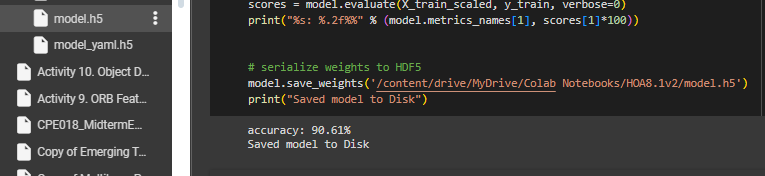

# Task 2: Save a model and load the model in a JSON format

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/Jmodel.json", "w") as json_file:
    json_file.write(model_json)

OUTPUT:

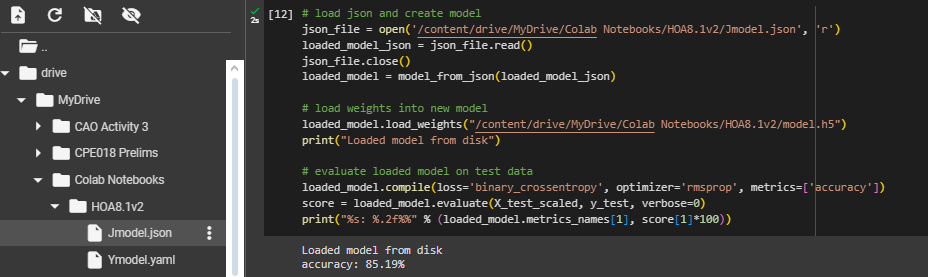

In [12]:
# load json and create model
json_file = open('/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/Jmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_scaled, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 85.19%


Observation:

After we save the model and loaded it, we can see the accuracy value is around 85.19%

# Task 3: Save a model and load the model in a YAML format

In [13]:
# serialize model to YAML
model_yaml = model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/Ymodel.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/model_yaml.h5")
print("Saved model to Computer")

Saved model to Computer


OUTPUT:

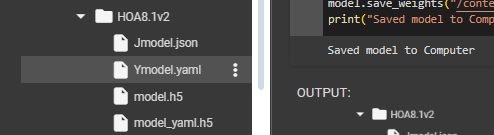

In [14]:
# load json and create model
yaml_file = open('/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/Ymodel.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)

# load weights into new model
loaded_model.load_weights('/content/drive/MyDrive/Colab Notebooks/HOA8.1v2/model_yaml.h5')
print("Loaded model from Computer")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_scaled, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from Computer
accuracy: 85.19%


Observation:

After we save it and loaded the model_Yaml.h5, we can see the accuracy that it holds is around 85%

# Task 4: Checkpoint Neural Network Model Improvements

In [15]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=50, batch_size=25, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.92958, saving model to weights-improvement-01-0.93.hdf5

Epoch 2: val_accuracy did not improve from 0.92958

Epoch 3: val_accuracy did not improve from 0.92958


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_accuracy did not improve from 0.92958

Epoch 5: val_accuracy did not improve from 0.92958

Epoch 6: val_accuracy did not improve from 0.92958

Epoch 7: val_accuracy did not improve from 0.92958

Epoch 8: val_accuracy did not improve from 0.92958

Epoch 9: val_accuracy did not improve from 0.92958

Epoch 10: val_accuracy did not improve from 0.92958

Epoch 11: val_accuracy did not improve from 0.92958

Epoch 12: val_accuracy did not improve from 0.92958

Epoch 13: val_accuracy did not improve from 0.92958

Epoch 14: val_accuracy did not improve from 0.92958

Epoch 15: val_accuracy did not improve from 0.92958

Epoch 16: val_accuracy did not improve from 0.92958

Epoch 17: val_accuracy did not improve from 0.92958

Epoch 18: val_accuracy did not improve from 0.92958

Epoch 19: val_accuracy did not improve from 0.92958

Epoch 20: val_accuracy did not improve from 0.92958

Epoch 21: val_accuracy did not improve from 0.92958

Epoch 22: val_accuracy did not improve from 0.92958

OUTPUT:

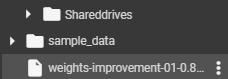

Observation:

As we can observe the file was created after we run the code, and the last val_accuracy that it got was 92%

# Task 5: Checkpoint Best Neural Network Model only

In [16]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=50, batch_size=25, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.87324, saving model to weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.87324

Epoch 3: val_accuracy did not improve from 0.87324


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_accuracy did not improve from 0.87324

Epoch 5: val_accuracy did not improve from 0.87324

Epoch 6: val_accuracy did not improve from 0.87324

Epoch 7: val_accuracy did not improve from 0.87324

Epoch 8: val_accuracy did not improve from 0.87324

Epoch 9: val_accuracy did not improve from 0.87324

Epoch 10: val_accuracy did not improve from 0.87324

Epoch 11: val_accuracy did not improve from 0.87324

Epoch 12: val_accuracy did not improve from 0.87324

Epoch 13: val_accuracy did not improve from 0.87324

Epoch 14: val_accuracy did not improve from 0.87324

Epoch 15: val_accuracy did not improve from 0.87324

Epoch 16: val_accuracy did not improve from 0.87324

Epoch 17: val_accuracy did not improve from 0.87324

Epoch 18: val_accuracy did not improve from 0.87324

Epoch 19: val_accuracy did not improve from 0.87324

Epoch 20: val_accuracy did not improve from 0.87324

Epoch 21: val_accuracy did not improve from 0.87324

Epoch 22: val_accuracy did not improve from 0.87324

OUTPUT:

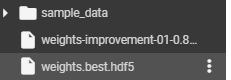

# Task 6: Load a saved Neural Network model

In [17]:
# Loading the saved model
model = Sequential()
model.add(Dense(16, input_dim=22, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Loading the saved weights (saved directly in google collab)
model.load_weights('/content/weights.best.hdf5')

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Getting the accuracy
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.19%


# Task 7: Visualize Model Training History in Keras

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


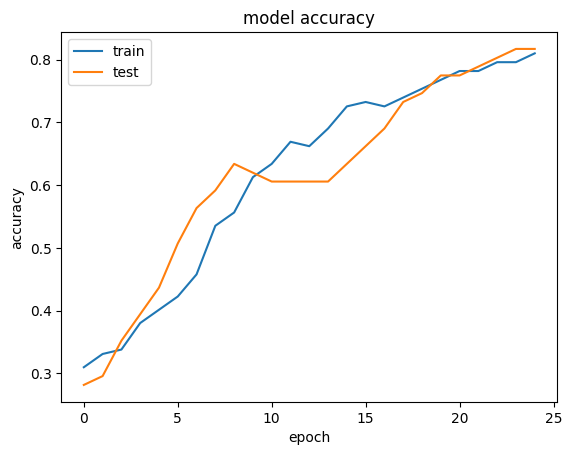

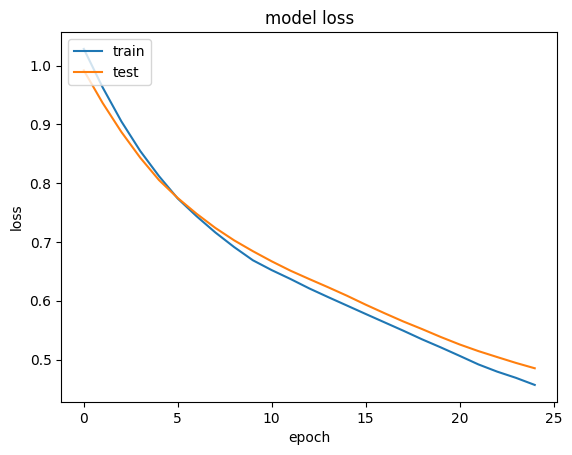

In [19]:
# Model
model = Sequential()
model.add(Dense(16, input_dim=22, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=25, batch_size=40, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Task 8: Show the application of Dropout Regularization

In [20]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


# Task 9: Show the application of Dropout on the visible layer

In [83]:
#model for task 9

model = Sequential()
model.add(Dropout(0.2, input_shape=(22,)))      #Dropout is set to 0.2
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=25, batch_size=40, verbose=0)

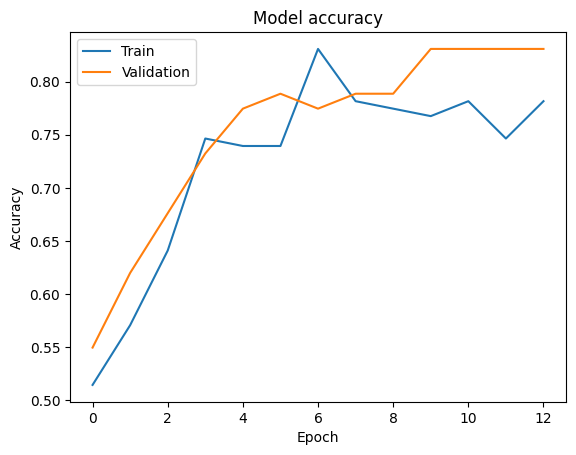

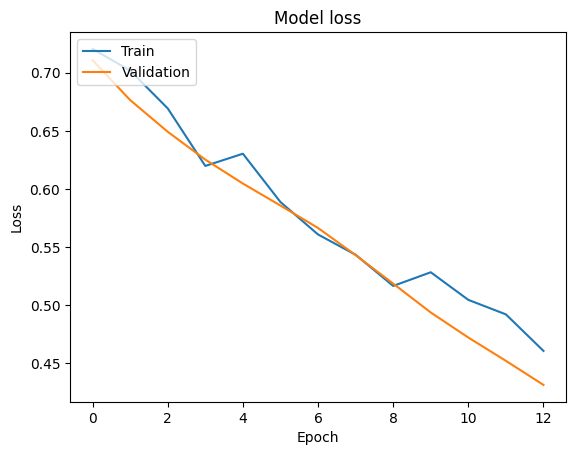

Accuracy: 87.04%
Loss: 43.75%


In [86]:
#plotting

plt.plot(history.history['accuracy'][::2])
plt.plot(history.history['val_accuracy'][::2])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'][::2])
plt.plot(history.history['val_loss'][::2])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate model
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
accuracy = scores[1] * 100
loss = scores[0] * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Loss: {loss:.2f}%")

# Task 10: Show the application of Dropout on the hidden layer

In [87]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(22,)))      #Dropout is set to 0.2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))                         #I added 3 dropout layers that are set to 0.2
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=25, batch_size=40, verbose=0)

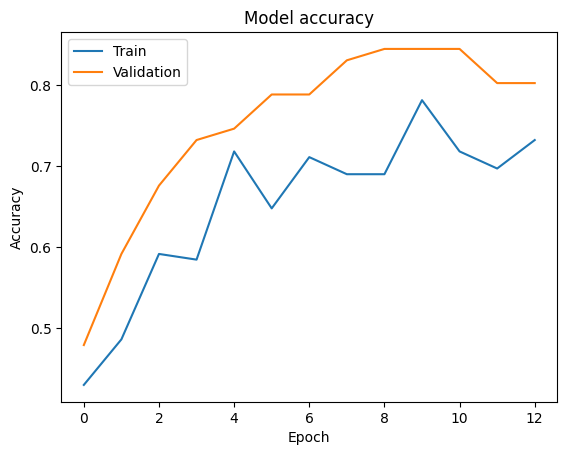

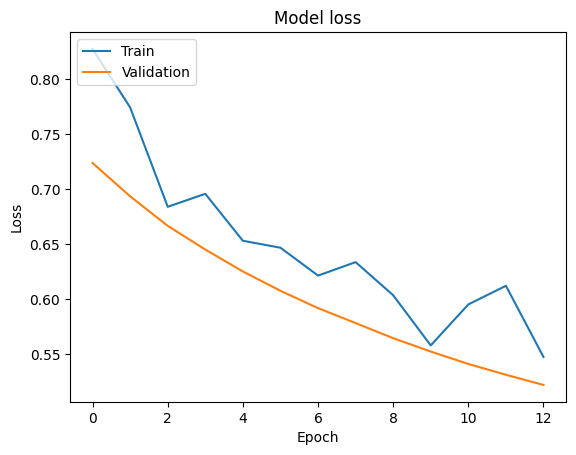

Accuracy: 83.33%
Loss: 49.21%


In [88]:
#plotting

plt.plot(history.history['accuracy'][::2])
plt.plot(history.history['val_accuracy'][::2])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'][::2])
plt.plot(history.history['val_loss'][::2])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate model
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
accuracy = scores[1] * 100
loss = scores[0] * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Loss: {loss:.2f}%")

# Task 11: Show the application of a time-based learning rate schedule

In [95]:
# Previous model from task 10
model = Sequential()
model.add(Dropout(0.2, input_shape=(22,)))      #Dropout is set to 0.2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))                         #I added 3 dropout layers that are set to 0.2
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

epochs = 25
learning_rate = 0.01
adam = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=25, batch_size=40, verbose=1)

# Evaluate model
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
accuracy = scores[1] * 100
loss = scores[0] * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Loss: {loss:.2f}%")

Epoch 1/25
4/4 [==============================] - 4s 199ms/step - loss: 1.5369 - accuracy: 0.2394 - val_loss: 0.9530 - val_accuracy: 0.2958
Epoch 2/25
4/4 [==============================] - 0s 51ms/step - loss: 0.8717 - accuracy: 0.3873 - val_loss: 0.7472 - val_accuracy: 0.4648
Epoch 3/25
4/4 [==============================] - 0s 48ms/step - loss: 0.7229 - accuracy: 0.6127 - val_loss: 0.6835 - val_accuracy: 0.7042
Epoch 4/25
4/4 [==============================] - 0s 44ms/step - loss: 0.6808 - accuracy: 0.7113 - val_loss: 0.6567 - val_accuracy: 0.7746
Epoch 5/25
4/4 [==============================] - 0s 46ms/step - loss: 0.6585 - accuracy: 0.7324 - val_loss: 0.6389 - val_accuracy: 0.7887
Epoch 6/25
4/4 [==============================] - 0s 55ms/step - loss: 0.6586 - accuracy: 0.7535 - val_loss: 0.6244 - val_accuracy: 0.8028
Epoch 7/25
4/4 [==============================] - 0s 52ms/step - loss: 0.6330 - accuracy: 0.7676 - val_loss: 0.6107 - val_accuracy: 0.8028
Epoch 8/25
4/4 [==========

# Task 12: Show the application of a drop-based learning rate schedule

In [107]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# Previous model from task 11
model = Sequential()
model.add(Dropout(0.2, input_shape=(22,)))      #Dropout is set to 0.2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))                         #I added 3 dropout layers that are set to 0.2
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(learning_rate=0.0), loss='binary_crossentropy', metrics=['accuracy'])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=25, batch_size=40, callbacks=[lrate], verbose=2)

# Evaluate model
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
accuracy = scores[1] * 100
loss = scores[0] * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Loss: {loss:.2f}%")

Epoch 1/25
4/4 - 1s - loss: 0.7280 - accuracy: 0.7254 - val_loss: 0.5116 - val_accuracy: 0.8028 - lr: 0.1000 - 1s/epoch - 355ms/step
Epoch 2/25
4/4 - 0s - loss: 0.5008 - accuracy: 0.7746 - val_loss: 0.4507 - val_accuracy: 0.8028 - lr: 0.1000 - 69ms/epoch - 17ms/step
Epoch 3/25
4/4 - 0s - loss: 0.5452 - accuracy: 0.7746 - val_loss: 0.4302 - val_accuracy: 0.8028 - lr: 0.1000 - 54ms/epoch - 13ms/step
Epoch 4/25
4/4 - 0s - loss: 0.4701 - accuracy: 0.7746 - val_loss: 0.4322 - val_accuracy: 0.8028 - lr: 0.1000 - 65ms/epoch - 16ms/step
Epoch 5/25
4/4 - 0s - loss: 0.4617 - accuracy: 0.7746 - val_loss: 0.4469 - val_accuracy: 0.8028 - lr: 0.1000 - 54ms/epoch - 13ms/step
Epoch 6/25
4/4 - 0s - loss: 0.4563 - accuracy: 0.7746 - val_loss: 0.4495 - val_accuracy: 0.8028 - lr: 0.1000 - 68ms/epoch - 17ms/step
Epoch 7/25
4/4 - 0s - loss: 0.4539 - accuracy: 0.7746 - val_loss: 0.4243 - val_accuracy: 0.8028 - lr: 0.1000 - 66ms/epoch - 16ms/step
Epoch 8/25
4/4 - 0s - loss: 0.4336 - accuracy: 0.7746 - val_los

# Summary and Conclusion

Summary

For my summary, what I did first is I imported the dataset using the UCI import to python. It is located in the UCI website, my dataset is called the SPECT heart. After importing the dataset to the Collab, I firstly check the dataset if they have null values or do they have different datatype that I need to convert to. Fortunately my dataset does not require any transforming of datatype since they have the same datatypes. Next is that I based my code mostly in the module provided in the canvas, it was quite tricky since in the module, per task there has a change in the dataset in a specific task. But I did compromise by editing some of the codes provided and converting it to a useable code in my case.

<br>
Conclusion

In this activity I have learned alot in this hands on activity, I now know how to save a neural network in JSON and YAML, In the module it was quite tricky at first on how to save the files directly into your personal google drive. But after sometime I was able to know on how I could directly save it to my google drive, I just have to run the mounting code and copy the path file from my google drive and we are all set. I also now know on how to add dropout layers in the visible and hidden layer the right way. What strucked me in this activity is on how we could also save the checkpoints in our neural network model, we simply just need to add again the path file of our gdrive in order to save it directly there. At first we can only save it locally in the google collab, but it turns out that's not the case. However I still opted to save it locally in the collab.